In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

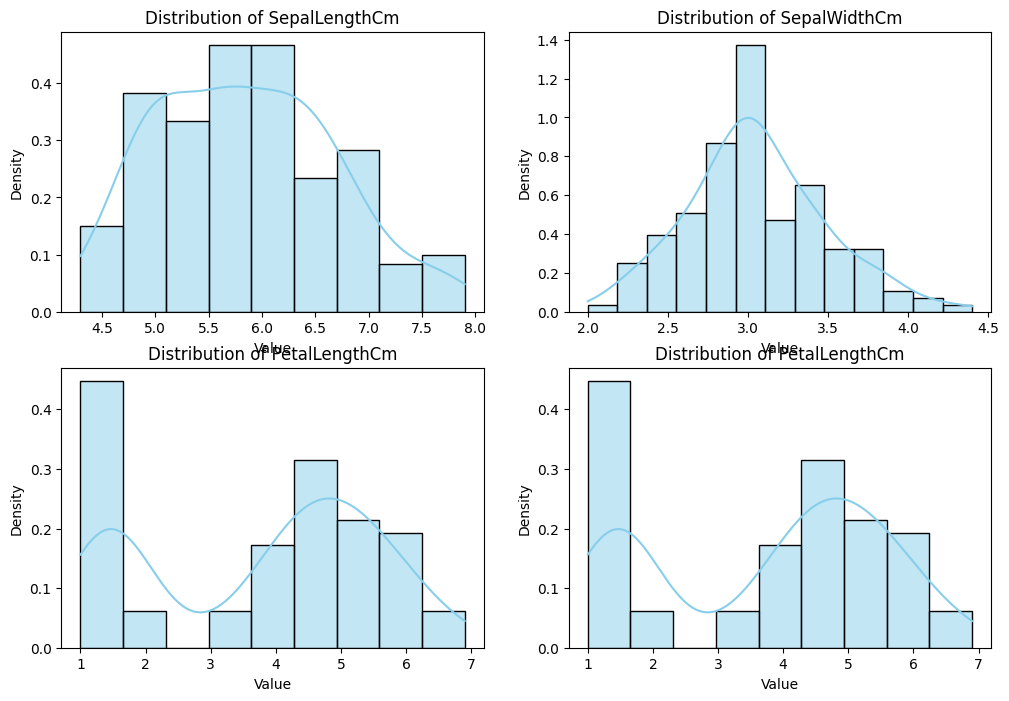

In [65]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalLengthCm']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten() 

for i, feature in enumerate(features):
    sns.histplot(data=data, x=feature, kde=True, ax=axes[i], color='skyblue', stat='density')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_ylabel('Density')
    axes[i].set_xlabel('Value')

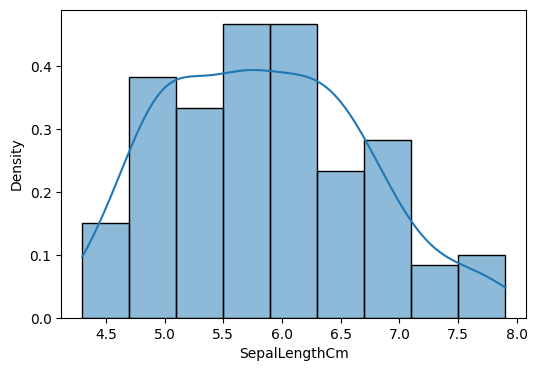

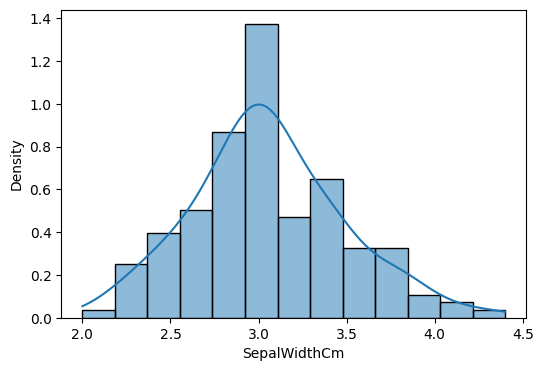

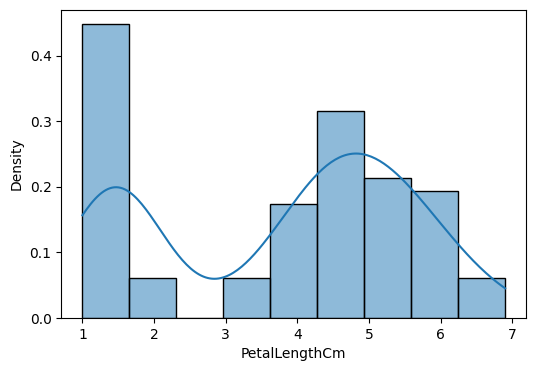

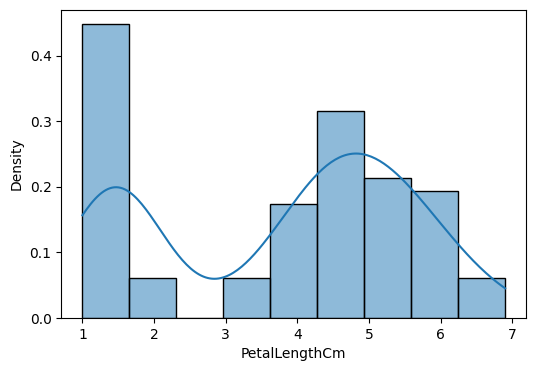

In [72]:
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=data, x=feature, kde=True, stat='density')

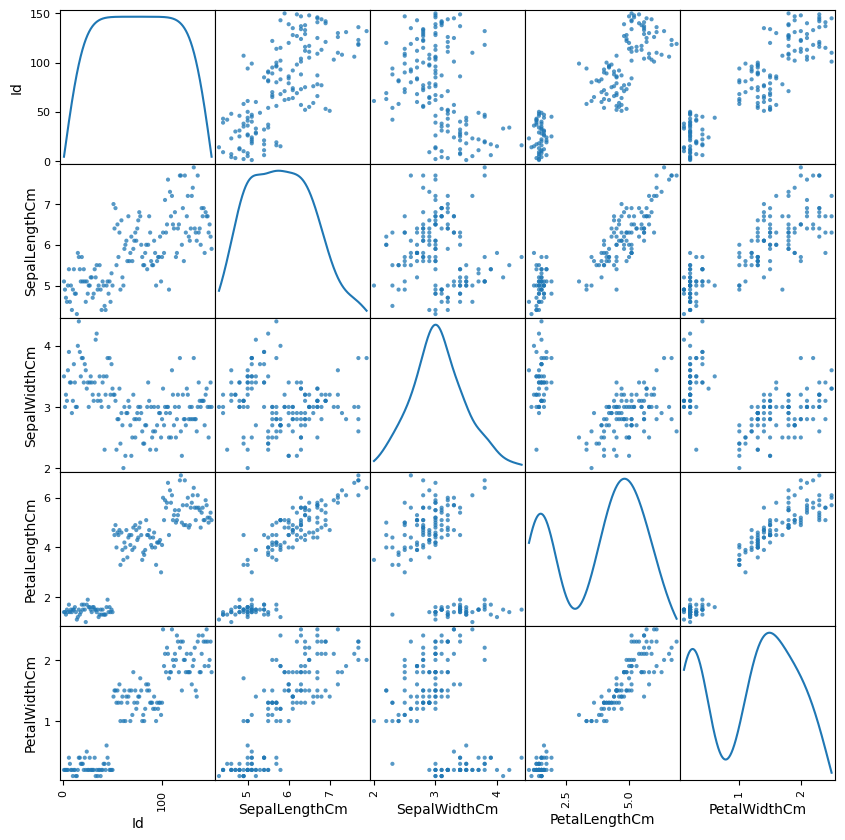

In [8]:
df = pd.read_csv('Iris.csv')

from pandas.plotting import scatter_matrix
scatter_plot = scatter_matrix(df.iloc[:, :-1],  # exclude 'species'
                              alpha=0.75, 
                              figsize=(10, 10), 
                              diagonal='kde')


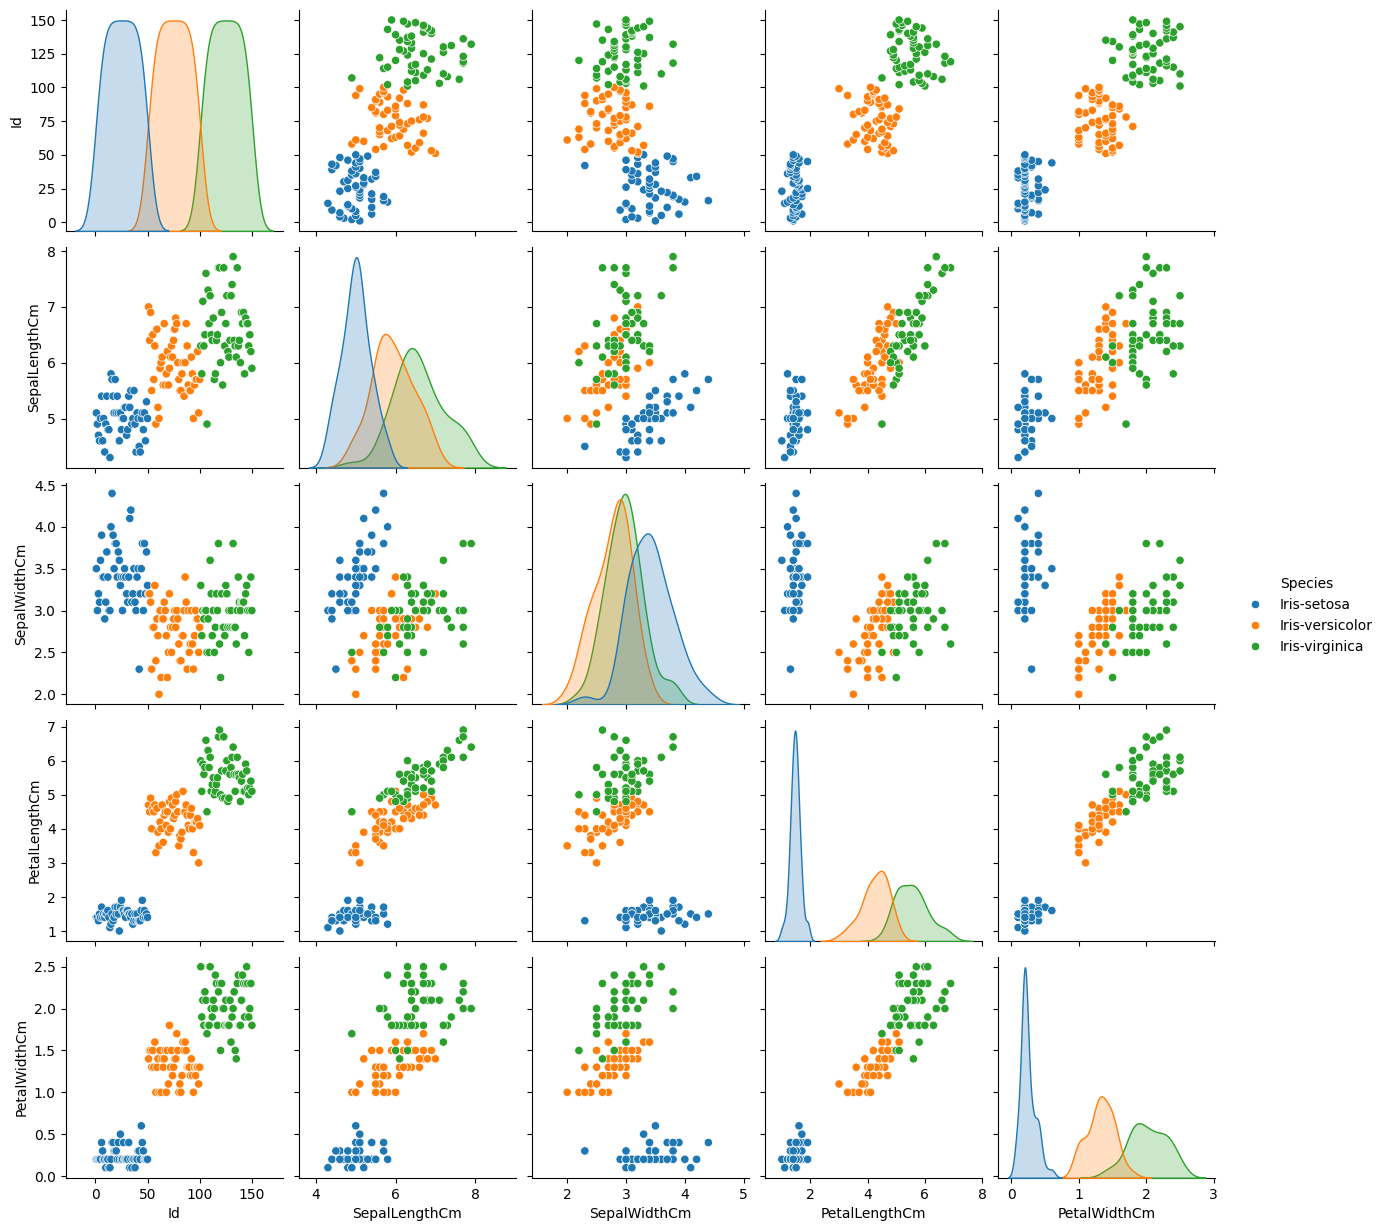

In [73]:
sns.pairplot(df,hue='Species') 

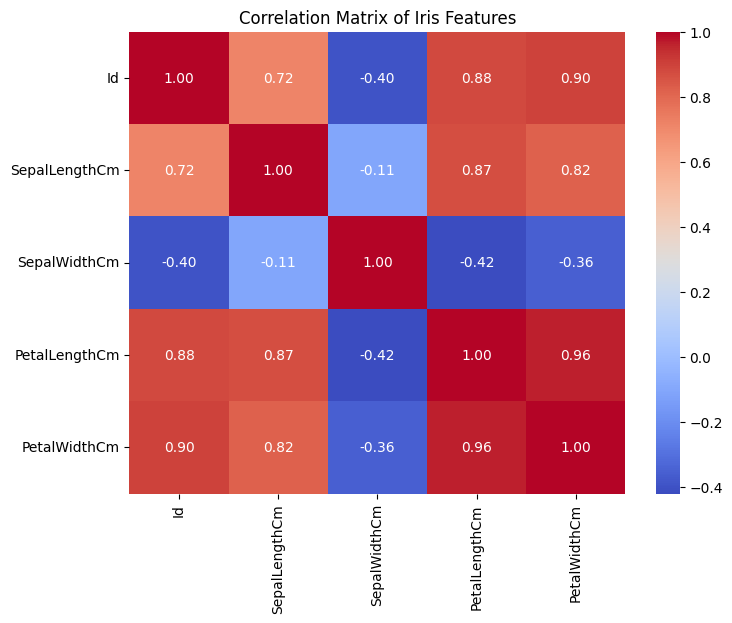

In [45]:
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Iris Features')
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
df = pd.read_csv('Iris.csv')

In [14]:
X = df.drop(columns =['Id','Species'], axis=1)
Y = df["Species"]

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)

Train Shape (112, 4)
Test Shape (38, 4)


## Logistic Regression

In [31]:
log = LogisticRegression()
log.fit(X_train,Y_train)
prediction=log.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, prediction)
precision = metrics.precision_score(Y_test, prediction, average='macro')
recall = metrics.recall_score(Y_test, prediction, average='macro')
f1 = metrics.f1_score(Y_test, prediction, average='macro')
cm = metrics.confusion_matrix(Y_test, prediction)

accuracy
precision
recall
f1
accuracy
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

## Confusion Matrix

In [40]:
from sklearn.datasets import load_iris
iris = load_iris()

In [41]:
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Text(0.5, 1.0, 'Confusion Matrix - Iris Dataset')

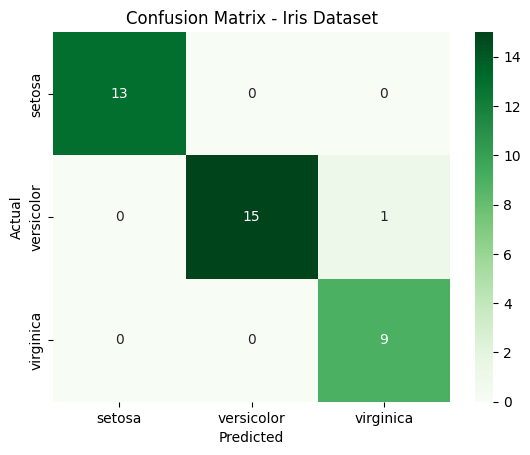

In [44]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Iris Dataset")

If your labels are strings (e.g., 'yes'/'no') or have more than 2 classes, use average argument:

In [49]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, prediction)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Decision Tree

In [54]:
tree=DecisionTreeClassifier()
tree.fit(X_train,Y_train)
prediction=tree.predict(X_test)
accuracy = metrics.accuracy_score(prediction,Y_test)
accuracy

0.9736842105263158

In [55]:
report = classification_report(Y_test, prediction)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



## K Nearest Neighbour Classification

In [56]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
prediction=knn.predict(X_test)
accuracy = metrics.accuracy_score(prediction,Y_test)
accuracy

0.9736842105263158

In [57]:
report = classification_report(Y_test, prediction)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



## Support Vector Machine

In [58]:
svc = SVC()
svc.fit(X_train, Y_train)
prediction = svc.predict(X_test)
accuracy = metrics.accuracy_score(prediction, Y_test)
accuracy

0.9736842105263158

In [59]:
report = classification_report(Y_test, prediction)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

